# Lecture 10 Extension - Elbow and Silhouette Method

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### K-Means and Elbow Method
When determining how many clusters to use, we often rely on the "elbow method." Scikit Learn does not have a function for this. But the method is realized using other packages such as "yellowbrick". This case, we need to first install the "yellowbrick" package. 

#### Package Installation - yellowbrick
The installation cannot be realized in Jupyter Notebook directly. Instead, in the search bar, type "Anaconda Prompt", and select the result. In the new interface, type: 
<center>conda install -c districtdatalabs yellowbrick</center>
Use enter to proceed. Wait for the package to be installed. If asked whether to proceed, type "y", then enter.

**<center>After installation, restart the kernel to import the package properly.</center>**

To know more about the installation of yellowbrick package, check: https://www.scikit-yb.org/en/latest/quickstart.html

In [2]:
## conda install -c districtdatalabs yellowbrick # This should be applied in anaconda prompt

In [3]:
# run below to check the package is properly installed
from yellowbrick.cluster import KElbowVisualizer

After installing the yellowbrick package, elbow method can be realized using syntax:
**<center>yellowbrick.cluster.ElbowVisualizer()</center>**
- We need to specify the KMeans model
- k: (k_min, k_max). Provides a range of k to walk through. Note that k_max is not included.
- metric: default is "distortion", which is the SSE. 
- timings: the time to train the model for each k. Default = True

Use .fit to train the model, then .show() to plot the figure.

For more details, refer to: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

#### Example
Suppose the ground truth has 2 features with 5 centers. Use KMeans for clustering, consider number of clusters k from 2 to 9 (inclusive). 
- Using elvow method, find the best k and visualize the result.
- Do we replicate the k? 
- Given the chosen k, predict the cluster labels. (You need to re-train a kmeans model and set k to the specific value).
- Create a scatter plot of the data, use different colors to show different predicted clusters. What do you find? 

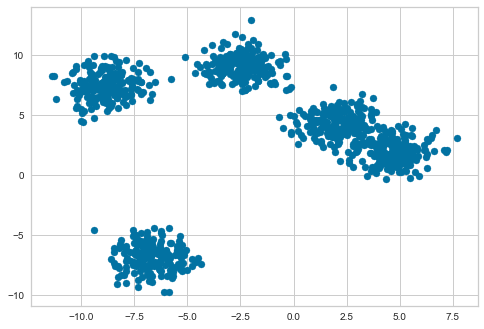

In [4]:
# S0: Data Generation
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=42)
plt.scatter(X[:,0], X[:,1])

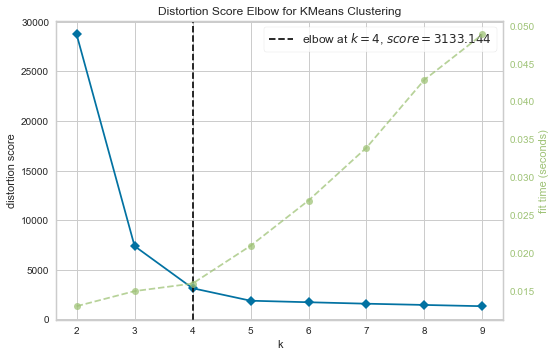

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# S1: Apply Elbow Method

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Define the funcion
kmeans = KMeans(random_state=1)

# Apply Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(X)        # Fit the data

visualizer.show()        # Plot the figure

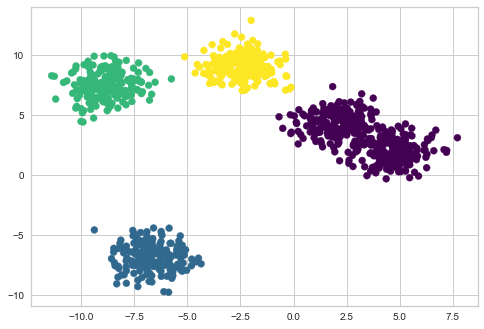

In [6]:
# S2: Predict the class label, then generate scatter plot
kmeans_chosen = KMeans(n_clusters=4, random_state=1)
kmeans_chosen.fit(X)

cls_predict = kmeans_chosen.predict(X)

plt.scatter(X[:,0], X[:,1], c=cls_predict, cmap='viridis')

## The Silhouette Method

Instead of the Elbow Method (which, at times, can appear "subjective" as the elbow is hard to find), the Silhouette method is another approach to find the proper cluster number k. 

Silhouette approach evaluates the performance of clustering based on the Silhouette coefficient. The explicit math definition can be found at: https://en.wikipedia.org/wiki/Silhouette_(clustering).

Intuitively, for a given data point, its Silhouette coefficient compares the is the "between cluster distance" and the "within cluster distance". The measure falls in the range [-1, 1]
- The "within cluster distance" is the average distance between the focal point and all other points in the *same* cluster. 
- The "between cluster distance" is the average distance between the focal point and all points from its neighboring cluster. 

Recall that the higher the between cluster distance, and the smaller the within cluster distance, the better the clustering. Mapping the intuition to the Silhouette coefficient values, we have: the higher the Silhouette value, the better the performance.

To obtain silhoutte coefficient, use syntax:
**<center>sklearn.metrics.silhouette_score</center>**

We need to write a loop to obtain the Silhouette score for all potential k, then choose the one that gives us the highest Silhouette score.

In [10]:
from sklearn.metrics import silhouette_score

# S1. Get silhouette scores. The output would be "sil", it stores the silhouette scores for all k

sil = [] # define an empty list - it will store the silhouette scores later

for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 0) # Define model and train the model 
    kmeans_trained = kmeans.fit(X)
    labels = kmeans_trained.predict(X) # Get the cluster label
    ## Alternatively, use syntax below
    # labels = kmeans_trained.labels_
    sil_score = silhouette_score(X, labels, metric = 'euclidean')
    sil.append(sil_score)


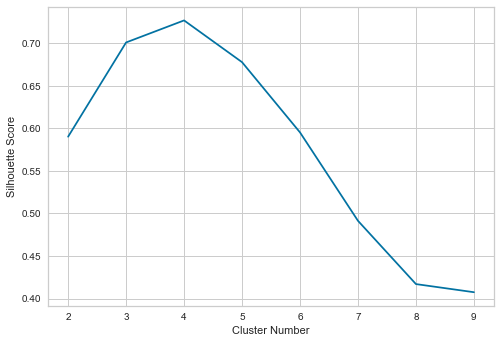

In [13]:
# S2. Visualization
import matplotlib.pyplot as plt

plt.plot(range(2,10), sil)
plt.xlabel('Cluster Number')
plt.ylabel('Silhouette Score')
plt.show()

# We choose the one with highest score. Thus, cluster = 4